In [2]:
%pip install scikit-commpy
%pip install sionna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-commpy: filename=scikit_commpy-0.8.0-py3-none-any.whl size=115007 sha256=5a176951e0aec796735684108de2e6d1c9f23b590cb4fb26a2bbb32239913448
  Stored in directory: /root/.cache/pip/wheels/36/eb/56/f0bffa07ed968244dac624cfc6dee75474b7b451299bf54950
Successfully built scikit-commpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.3/384.3 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.0 MB/s eta 0:00:00
   

In [ ]:
import numpy as np
from commpy.channels import awgn

In [ ]:
def bpsk_modulation(bits):
    # Define the phase states for BPSK modulation
    phase_states = [-1, 1]
    # Map the bits to the corresponding phase states
    phase_sequence = [phase_states[int(b)] for b in bits]
    # Generate the modulated signal
    modulated_signal = np.array(phase_sequence)
    return modulated_signal

def bpsk_demodulation(received_signal):
    # Create a decision threshold at 0
    decision_threshold = 0
    # Demodulate the received signal based on the decision threshold
    demodulated_bits = (received_signal > decision_threshold).astype(int)
    return demodulated_bits

In [ ]:
bits = '110010101011'

# Modulate the binary string using BPSK
modulated_signal = bpsk_modulation(bits)
print(f"modulated => {modulated_signal}")

# Add AWGN to the modulated signal with SNR = 2
noisy_signal = awgn(modulated_signal, 2)
print(f"Noisy data => {noisy_signal}")

# Demodulate the received signal using BPSK
demodulated_signal = bpsk_demodulation(noisy_signal)
print(f"demodulated => {demodulated_signal}")

# Convert the demodulated signal to a binary string
binary_string = ''.join(str(int(b)) for b in demodulated_signal)

# Print the original binary string and the demodulated binary string
print('Original: ', bits)
print('Final   : ', binary_string)

modulated => [ 1  1 -1 -1  1 -1  1 -1  1 -1  1  1]
Noisy data => [ 0.22405784  1.46559396 -0.46697762 -1.09793469 -0.44916324 -1.41656889
  0.87957325 -0.30907777  1.01233711 -0.5368717   1.8107745  -0.22962967]
demodulated => [1 1 0 0 0 0 1 0 1 0 1 0]
Original:  110010101011
Final   :  110000101010


In [ ]:
import numpy as np
from commpy.modulation import PSKModem

# Generate random binary data
n_bits = 100
binary_data = np.random.randint(0, 2, n_bits)

print("Binary: ", binary_data)
# Create BPSK modem
bpsk_modem = PSKModem(8)

# Modulate binary data using BPSK
bpsk_symbols = bpsk_modem.modulate(binary_data)
print("Modulated Data: ", bpsk_symbols)

noisy_signal = awgn(bpsk_symbols, 2)

# Demodulate the BPSK symbols
demodulated_data = bpsk_modem.demodulate(noisy_signal,demod_type='hard')

# Print demodulated data
print("Demodulated Data: ", demodulated_data)
print(binary_data == demodulated_data)

Binary:  [0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0]
Modulated Data:  [-7.07106781e-01+7.07106781e-01j  6.12323400e-17+1.00000000e+00j
  1.00000000e+00+0.00000000e+00j -1.00000000e+00+1.22464680e-16j
 -1.83697020e-16-1.00000000e+00j  1.00000000e+00+0.00000000e+00j
  7.07106781e-01-7.07106781e-01j  1.00000000e+00+0.00000000e+00j
  7.07106781e-01-7.07106781e-01j  7.07106781e-01+7.07106781e-01j
 -1.00000000e+00+1.22464680e-16j  1.00000000e+00+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j -1.83697020e-16-1.00000000e+00j
  1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
  1.00000000e+00+0.00000000e+00j  7.07106781e-01+7.07106781e-01j
 -1.00000000e+00+1.22464680e-16j -7.07106781e-01-7.07106781e-01j
  7.07106781e-01-7.07106781e-01j  7.07106781e-01-7.07106781e-01j
  1.00000000e+00+0.00000000e+00j  6.12323400e-17+1.0000

<ipython-input-15-c7e19e763690>:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(binary_data == demodulated_data)


In [ ]:
import numpy as np
a = [1, 0, 1, 0, 0, 1]
print(bpsk_modem.modulate(np.array(a)))

[-1.+1.2246468e-16j  1.+0.0000000e+00j -1.+1.2246468e-16j
  1.+0.0000000e+00j  1.+0.0000000e+00j -1.+1.2246468e-16j]


In [ ]:
from random import randint

n = 4 # number of elements in each binary list
result = [[randint(0, 1) for _ in range(n)] for _ in range(10)] # generate 10 random binary lists with 4 elements each
k = [bpsk_modem.modulate(x) for x in result]
print(k)

[array([-1.+1.2246468e-16j,  1.+0.0000000e+00j]), array([1.        +0.j        , 0.70710678+0.70710678j]), array([0.70710678-0.70710678j, 0.70710678+0.70710678j]), array([-0.70710678+0.70710678j,  1.        +0.j        ]), array([6.123234e-17+1.j, 1.000000e+00+0.j]), array([0.70710678-0.70710678j, 0.70710678+0.70710678j]), array([0.70710678+0.70710678j, 1.        +0.j        ]), array([0.70710678-0.70710678j, 0.70710678+0.70710678j]), array([-1.        +1.22464680e-16j,  0.70710678+7.07106781e-01j]), array([0.70710678+0.70710678j, 1.        +0.j        ])]


In [ ]:
import numpy as np

# Assuming arr is your numpy array of numpy arrays
arr = np.array([[0, 1, 0, 1], [1, 0, 1, 0], [0, 0, 1, 1]])
print(type(arr), type(arr[0]))
# Convert to a list of lists
ll = arr.tolist()
print(type(ll), type(ll[0]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'list'> <class 'list'>


In [ ]:
import numpy as np

# Assuming arr is your numpy array of float values
arr = np.array([[1.2, 2.3, 3.4], [0.1, 1.3, 2.6]])

# Round to the nearest integer
arr_rounded = np.round(arr)

# Convert to an array of integers
arr_int = arr_rounded.astype(int)
print(arr_int)

[[1 2 3]
 [0 1 3]]


In [17]:
import sionna as sn
from commpy.modulation import PSKModem
from commpy.channels import awgn
import random
import numpy as np
import pandas as pd
import time

binsource = sn.utils.BinarySource()
rates = [1/2, 1/3, 2/3, 3/4]
encoded = []
modem = PSKModem(8)

In [ ]:
start = time.time()

for i in range(1):
    r = random.choice(rates)
    n = np.random.randint(1024, 2048)
    k = int(n*r)
    enc = sn.fec.ldpc.LDPC5GEncoder(k, n)
    msg = binsource([1, k])
    c = enc(msg).numpy().astype(int).tolist()[0]
    mod = modem.modulate(c)
    noisy = awgn(mod, 10, r)
    demod = modem.demodulate(noisy, demod_type='hard')
    s = ''.join(str(bit) for bit in demod)
    encoded.append(s)

print(f"Time: {time.time() - start}")


Time: 0.2809908390045166


In [ ]:
print(0.28 * 200000)

56000.00000000001


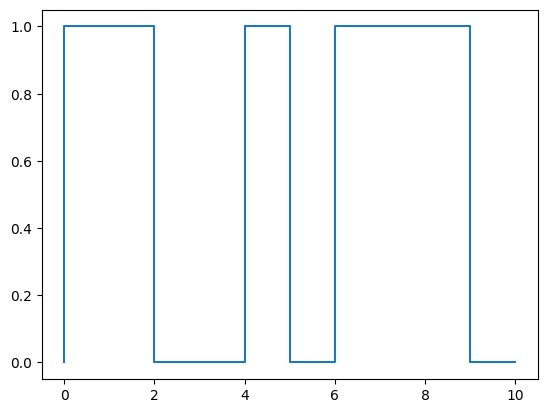

In [1]:
import matplotlib.pyplot as plt

data = [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
x = range(len(data))
plt.step(x, data)
plt.show()

# Implement

In [27]:
rate = 3/4
n = 2048
k = int(n * rate)
encoder = sn.fec.ldpc.LDPC5GEncoder(k, n)
msg = binsource([1, k])
data = encoder(msg).numpy().astype(int).tolist()[0]

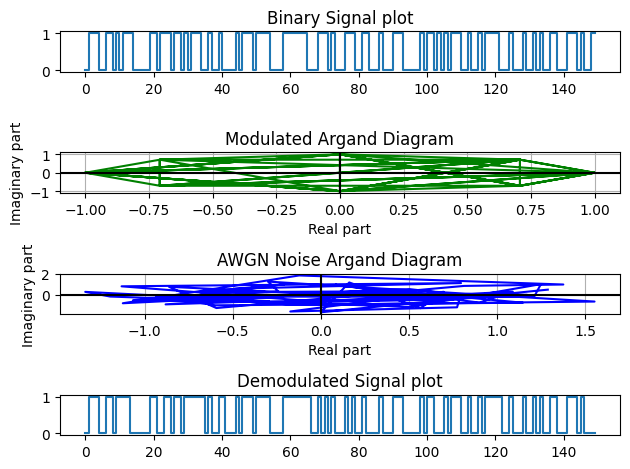

In [35]:
from commpy.modulation import PSKModem
from commpy.channels import awgn
import numpy as np

psk = PSKModem(8)
# data = [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
x = range(len(data))
plt.subplot(4,1,1)
plt.step(x, data)
plt.title("Binary Signal plot")

k = psk.modulate(data).tolist()
# print(k)
real = np.real(k)
comp = np.imag(k)
plt.subplot(4,1,2)
plt.plot(real, comp, color='g')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Modulated Argand Diagram')
plt.grid(True)

# print(n)
n = awgn(k, 10, 1/2)
real = np.real(n)
comp = np.imag(n)
plt.subplot(4,1,3)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('AWGN Noise Argand Diagram')
plt.grid(True)

d = psk.demodulate(n, demod_type='hard')
x = range(len(d))
plt.subplot(4,1,4)
plt.step(x, d)
plt.title("Demodulated Signal plot")

plt.tight_layout()
plt.show()

# Test

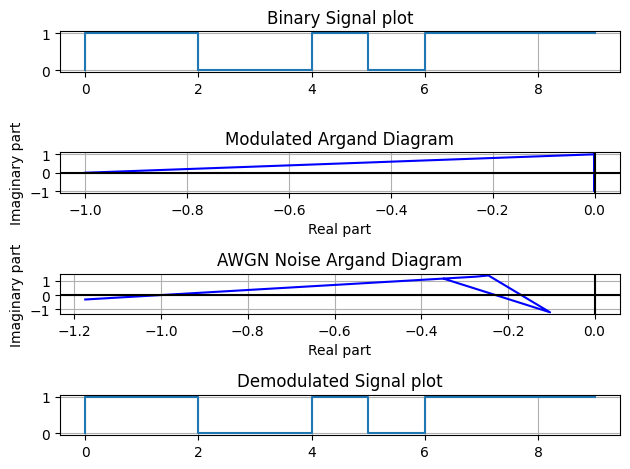

In [36]:
from commpy.modulation import PSKModem
from commpy.channels import awgn
import numpy as np

psk = PSKModem(4)
data = [0, 1, 1, 0, 0, 1, 0, 1, 1, 1]
x = range(len(data))
plt.subplot(4,1,1)
plt.step(x, data)
plt.grid(True)
plt.title("Binary Signal plot")

k = psk.modulate(data).tolist()
# print(k)
real = np.real(k)
comp = np.imag(k)
plt.subplot(4,1,2)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Modulated Argand Diagram')
plt.grid(True)

# print(n)
n = awgn(k, 10, 1/2)
real = np.real(n)
comp = np.imag(n)
plt.subplot(4,1,3)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('AWGN Noise Argand Diagram')
plt.grid(True)

d = psk.demodulate(n, demod_type='hard')
x = range(len(d))
plt.subplot(4,1,4)
plt.step(x, d)
plt.grid(True)
plt.title("Demodulated Signal plot")

plt.tight_layout()
plt.show()

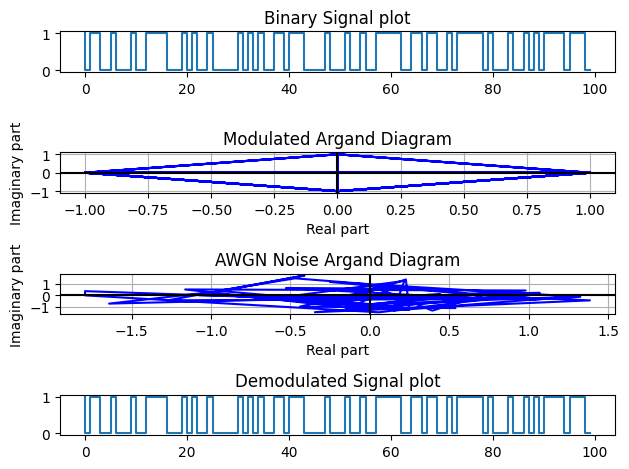

In [31]:
rate = 3/4
n = 100
k = int(n * rate)
encoder = sn.fec.ldpc.LDPC5GEncoder(k, n)
msg = binsource([1, k])
data = encoder(msg).numpy().astype(int).tolist()[0]

from commpy.modulation import PSKModem
from commpy.channels import awgn
import numpy as np

psk = PSKModem(4)
# data = [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
x = range(len(data))
plt.subplot(4,1,1)
plt.step(x, data)
plt.title("Binary Signal plot")

k = psk.modulate(data).tolist()
# print(k)
real = np.real(k)
comp = np.imag(k)
plt.subplot(4,1,2)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Modulated Argand Diagram')
plt.grid(True)

# print(n)
n = awgn(k, 10, 1/2)
real = np.real(n)
comp = np.imag(n)
plt.subplot(4,1,3)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('AWGN Noise Argand Diagram')
plt.grid(True)

d = psk.demodulate(n, demod_type='hard')
x = range(len(d))
plt.subplot(4,1,4)
plt.step(x, d)
plt.title("Demodulated Signal plot")

plt.tight_layout()
plt.show()

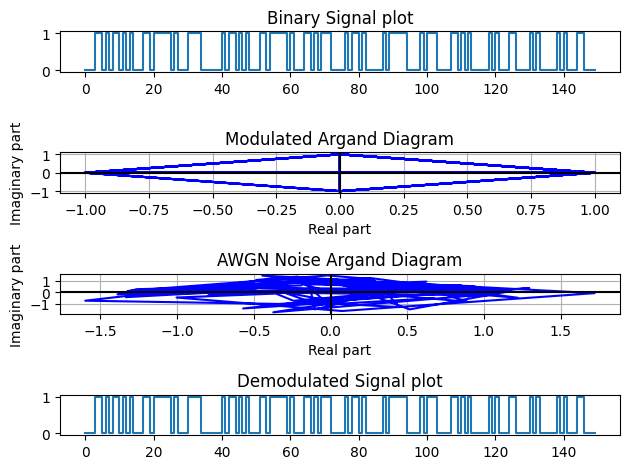

In [32]:
rate = 3/4
n = 100
k = int(n * rate)
encoder = sn.fec.turbo.TurboEncoder(constraint_length=4,
                                    rate=1/2)
msg = binsource([1, k])
data = encoder(msg).numpy().astype(int).tolist()[0]

from commpy.modulation import PSKModem
from commpy.channels import awgn
import numpy as np

psk = PSKModem(4)
# data = [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
x = range(len(data))
plt.subplot(4,1,1)
plt.step(x, data)
plt.title("Binary Signal plot")

k = psk.modulate(data).tolist()
# print(k)
real = np.real(k)
comp = np.imag(k)
plt.subplot(4,1,2)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Modulated Argand Diagram')
plt.grid(True)

# print(n)
n = awgn(k, 10, 1/2)
real = np.real(n)
comp = np.imag(n)
plt.subplot(4,1,3)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('AWGN Noise Argand Diagram')
plt.grid(True)

d = psk.demodulate(n, demod_type='hard')
x = range(len(d))
plt.subplot(4,1,4)
plt.step(x, d)
plt.title("Demodulated Signal plot")

plt.tight_layout()
plt.show()

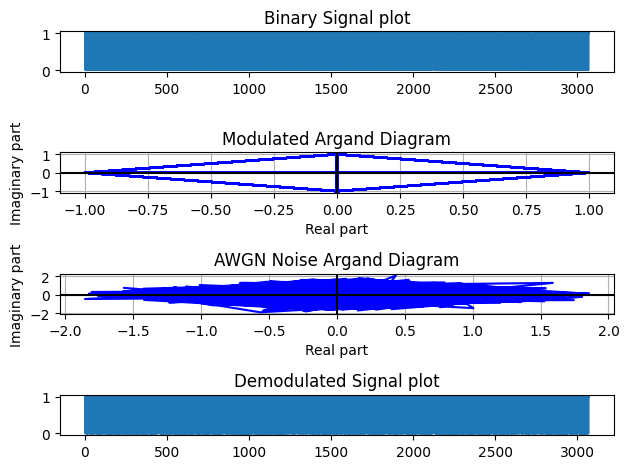

In [40]:
rate = 3/4
n = 2048
k = int(n * rate)
encoder = sn.fec.turbo.TurboEncoder(constraint_length=4,
                                    rate=1/2)
msg = binsource([1, k])
data = encoder(msg).numpy().astype(int).tolist()[0]

from commpy.modulation import PSKModem
from commpy.channels import awgn
import numpy as np

psk = PSKModem(4)
# data = [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
x = range(len(data))
plt.subplot(4,1,1)
plt.step(x, data)
plt.title("Binary Signal plot")

k = psk.modulate(data).tolist()
# print(k)
real = np.real(k)
comp = np.imag(k)
plt.subplot(4,1,2)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Modulated Argand Diagram')
plt.grid(True)

# print(n)
n = awgn(k, 10, 1/2)
real = np.real(n)
comp = np.imag(n)
plt.subplot(4,1,3)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('AWGN Noise Argand Diagram')
plt.grid(True)

d = psk.demodulate(n, demod_type='hard')
x = range(len(d))
plt.subplot(4,1,4)
plt.step(x, d)
plt.title("Demodulated Signal plot")

plt.tight_layout()
plt.show()

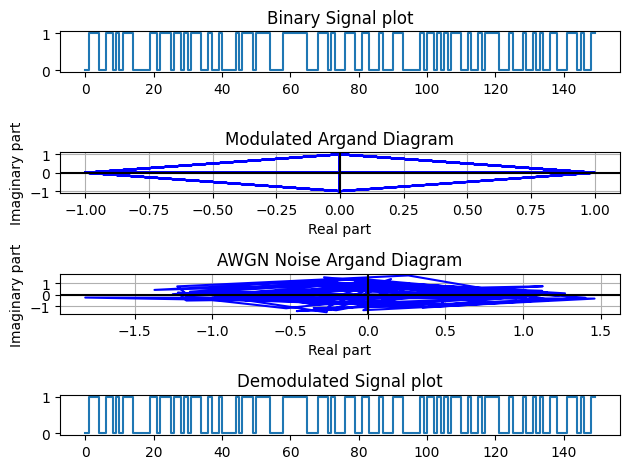

In [33]:
rate = 3/4
n = 100
k = int(n * rate)
encoder = sn.fec.conv.ConvEncoder(constraint_length=7,
                                    rate=1/2)
msg = binsource([1, k])
data = encoder(msg).numpy().astype(int).tolist()[0]

from commpy.modulation import PSKModem
from commpy.channels import awgn
import numpy as np

psk = PSKModem(4)
# data = [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
x = range(len(data))
plt.subplot(4,1,1)
plt.step(x, data)
plt.title("Binary Signal plot")

k = psk.modulate(data).tolist()
# print(k)
real = np.real(k)
comp = np.imag(k)
plt.subplot(4,1,2)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Modulated Argand Diagram')
plt.grid(True)

# print(n)
n = awgn(k, 10, 1/2)
real = np.real(n)
comp = np.imag(n)
plt.subplot(4,1,3)
plt.plot(real, comp, color='b')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('AWGN Noise Argand Diagram')
plt.grid(True)

d = psk.demodulate(n, demod_type='hard')
x = range(len(d))
plt.subplot(4,1,4)
plt.step(x, d)
plt.title("Demodulated Signal plot")

plt.tight_layout()
plt.show()